# Image Scaling attacks 
# Final project SCC5830 Image Processing (ICMC USP)

**Author:** Erikson Julio de Aguiar (PhD student)

**Group ID:** P28

## 1 - Introduction

### 1.1 Motivation

- image scaling generate a new image with different size (smaller or larger)
- For instance in Convolution Neural networks the Pooling layer used to convert original image to smaller size
- Algorithms scaling: Nearest-neighbor interpolation, Bilinear interpolation, Area interpolation, Lanczos interpolation

- Image scaling attack, enable adversaries to manipulate images
- Image scaling can fool neural networks before poisoning the dataset
- If combined with modern techniques of steganography, enable adversaries to generate powerful malware hidden in images
- In medical environment, image scaling attack might result of high impact to security and privacy of patient and practitioners

### 1.2 Project proposal

We aim to analyze attack characteristics and mitigate attack impact by using enhancement filters

### 1.3 Research questions

**Questions:**

- **Research question 1:** How we can identify if an image was affect to image scaling attack?

- **Research question 2:** Can we to apply enhancement methods to mitigate impact of attack on image aim to make its reconstruction?

- **Research question 3:** Image scaling attack would be effective against medical images? 

### 1.4 Summary of attack

Objective function: $||min(\Delta)||_{2}^{2}$

s.t. $||L.(S^{'} + \Delta^{'}) - T||_{\infty} \leq \epsilon$

- To build perturbations is applying matrix coefficients based on image processing libraries such as PIL, CV2  and TF
- Optimization Quadratic function
- Attack rescaling columns and line of matrix
- Lib cvxpy

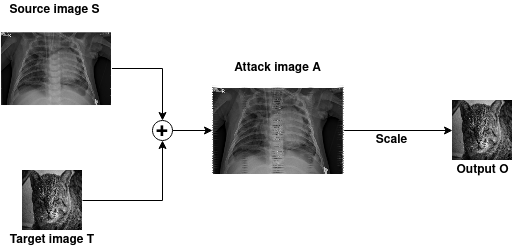

In [9]:
from IPython.display import Image
Image(filename='./images/image-scaling.png')

### 1.5 Dataset

- Dataset from Kaggle https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia
- Medical images related to chest with Pneumonia and Normal
- The dataset contains 5856 files 
- In this project, amount of image is not relevant
- We tested with 30 images and build the attack on them

### 1.5 Project structure

- Show images
- Defensive methods
- Results
- Challenges and limitations

## 2. Load useful modules

In [89]:
#Propose modules
from attack_module import ImageScaling
from defense_module import Defense

import imageio
import numpy as np
import matplotlib.pyplot as plt
import scipy
import glob
import re
import scipy
import pandas as pd
import seaborn as sns

### 2.1 Load images

In [2]:
image_attack = imageio.imread("./images/img_attack.png", as_gray=True)
image_attack2 = imageio.imread("./images/attacks_experiments/img9_attack_PIL_NEAREST.jpeg", as_gray=True)
image_original = imageio.imread("./images/chest.png",  as_gray=True)
image_original2 = imageio.imread("./images/chest_images/chest9.jpeg",  as_gray=True)

(-0.5, 441.5, 301.5, -0.5)

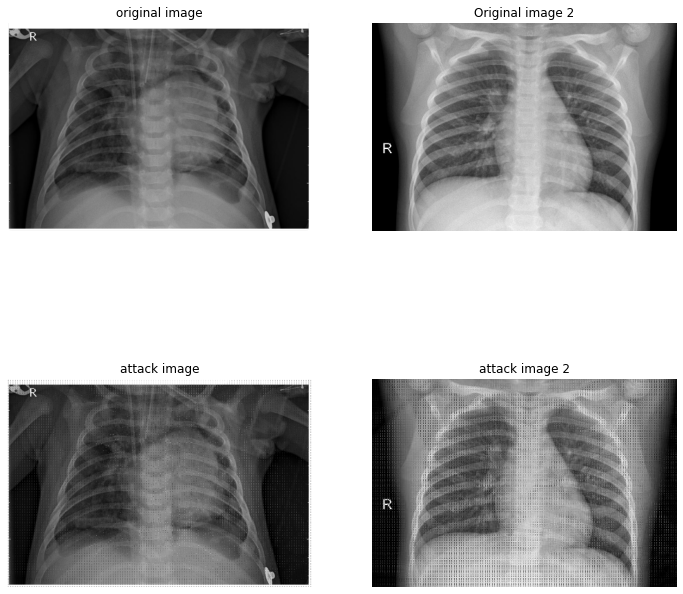

In [58]:
plt.figure(figsize=(12,12)) 

plt.subplot(221)
plt.imshow(image_original, cmap="gray", vmin=0, vmax=255)
plt.title("original image")
plt.axis('off')

plt.subplot(222)
plt.imshow(image_original2, cmap="gray", vmin=0, vmax=255)
plt.title("Original image 2")
plt.axis('off')

plt.axis('off')
plt.subplot(223)
plt.imshow(image_attack, cmap="gray", vmin=0, vmax=255)
plt.title("attack image")
plt.axis('off')

plt.axis('off')
plt.subplot(224)
plt.imshow(image_attack2, cmap="gray", vmin=0, vmax=255)
plt.title("attack image 2")
plt.axis('off')

## 3. Defensive Methods

In [47]:
df = Defense()

## 3.1 - Analysis attack images
**Objective:** Detect attack

In [4]:
hist_original = df.build_histogram(image_original, 256)
hist_original2 = df.build_histogram(image_original2, 256)
hist_attack = df.build_histogram(image_attack, 256)
hist_attack2 = df.build_histogram(image_attack2, 256)

Text(0, 0.5, 'Frequency')

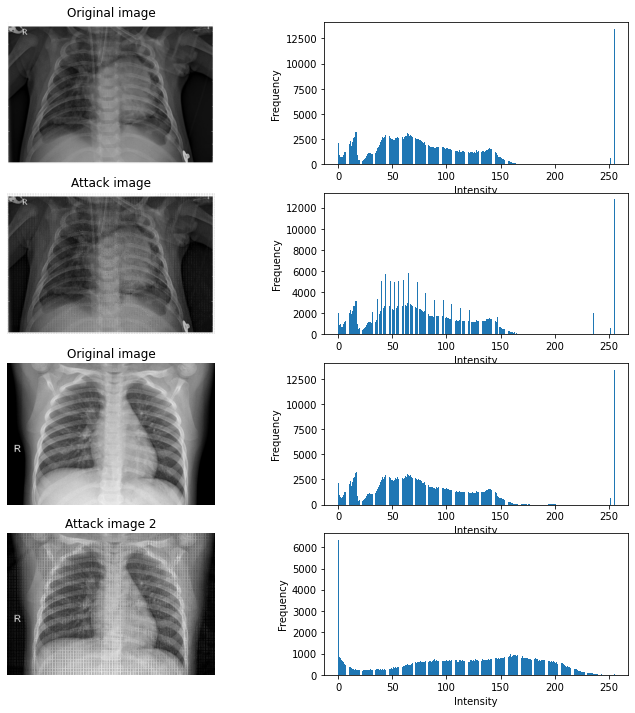

In [61]:
plt.figure(figsize=(12,12)) 

plt.subplot(421)
plt.imshow(image_original, cmap="gray", vmin=0, vmax=255)
plt.title("Original image")
plt.axis('off')
plt.subplot(422)
plt.bar(range(256), hist_original)
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(423)
plt.imshow(image_attack, cmap="gray", vmin=0, vmax=255)
plt.title("Attack image")
plt.axis('off')
plt.subplot(424)
plt.bar(range(256),hist_attack)
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(425)
plt.imshow(image_original2, cmap="gray", vmin=0, vmax=255)
plt.title("Original image")
plt.axis('off')
plt.subplot(426)
plt.bar(range(256), hist_original)
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(427)
plt.imshow(image_attack2, cmap="gray", vmin=0, vmax=255)
plt.title("Attack image 2")
plt.axis('off')
plt.subplot(428)
plt.bar(range(256), hist_attack2)
plt.xlabel('Intensity')
plt.ylabel('Frequency')

## 3.2 Minimum filter
**Objective:** Detect attack

In [5]:
img_new = imageio.imread("./images/attacks_experiments/img8_attack_CV_NEAREST.jpeg", as_gray=True)

In [6]:
hist_new = df.build_histogram(img_new, 256)

In [7]:
hist_min, img_min = df.restoration_image_min(img_new)

Text(0, 0.5, 'Frequency')

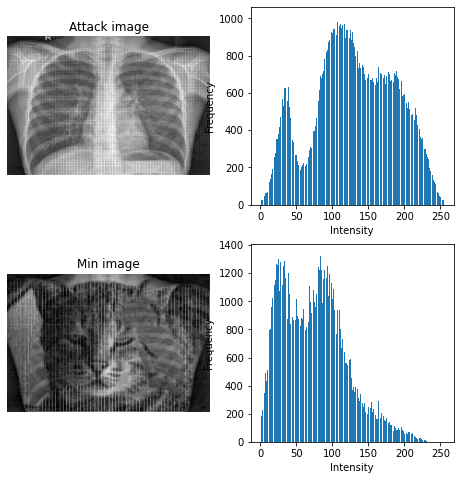

In [8]:
plt.figure(figsize=(8,8))

plt.subplot(221)
plt.imshow(img_new, cmap="gray", vmin=0, vmax=255)
plt.title("Attack image")
plt.axis('off')
plt.subplot(222)
plt.bar(range(256), hist_new)
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(223)
plt.imshow(img_min, cmap="gray", vmin=0, vmax=255)
plt.title("Min image")
plt.axis('off')
plt.subplot(224)
plt.bar(range(256), hist_min)
plt.xlabel('Intensity')
plt.ylabel('Frequency')

## 3.3 Methods to mitigate attack and recovery image
**Objetive:** recovery image

### 3.3.1 remove image peaks

In [9]:
attack1_rec_hist, attack1_rest = df.restoration_peak(image_attack)
attack2_rec_hist, attack2_rest = df.restoration_peak(image_attack2)

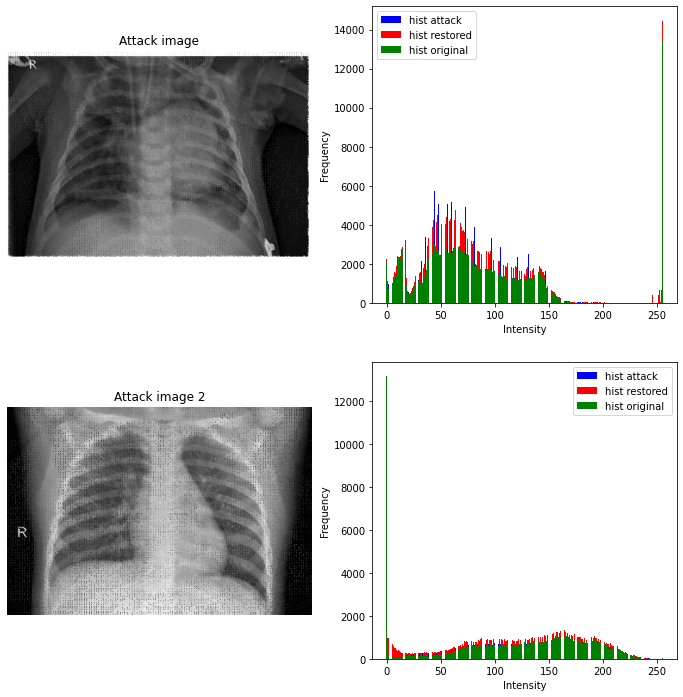

In [10]:
plt.figure(figsize=(12,12))

plt.subplot(221)
plt.imshow(attack1_rest, cmap="gray", vmin=0, vmax=255)
plt.title("Attack image")
plt.axis('off')
plt.subplot(222)
plt.bar(range(256), hist_attack, color='b')
plt.bar(range(256), attack1_rec_hist, color='r')
plt.bar(range(256), hist_original, color='g')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.legend(labels={'hist attack': 'b', 'hist restored': 'r', 'hist original': 'g'})

plt.subplot(223)
plt.imshow(attack2_rest, cmap="gray", vmin=0, vmax=255)
plt.title("Attack image 2")
plt.axis('off')
plt.subplot(224)
plt.bar(range(256), hist_attack2, color='b')
plt.bar(range(256), attack2_rec_hist, color='r')
plt.bar(range(256), hist_original2, color='g')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.legend(labels={'hist attack': 'b', 'hist restored': 'r', 'hist original': 'g'})

### 3.3.2 Median filter

In [324]:
attack1_median_hist, attack1_median_rest = df.restoration_image_median(image_attack)
attack2_median_hist, attack2_median_rest = df.restoration_image_median(image_attack2)

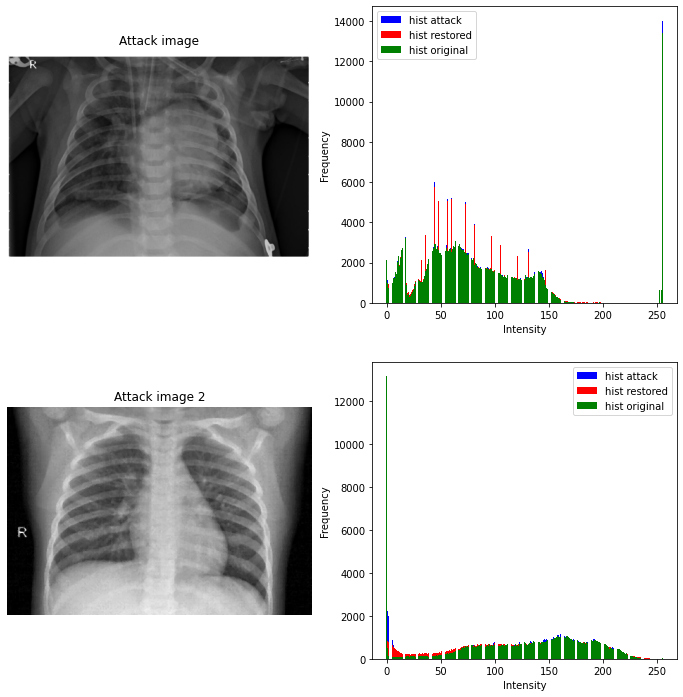

In [327]:
plt.figure(figsize=(12,12))

plt.subplot(221)
plt.imshow(attack1_median_rest, cmap="gray", vmin=0, vmax=255)
plt.title("Attack image")
plt.axis('off')
plt.subplot(222)
plt.bar(range(256), attack1_median_hist, color='b')
plt.bar(range(256), hist_attack, color='r')
plt.bar(range(256), hist_original, color='g')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.legend(labels={'hist attack': 'r', 'hist restored': 'b', 'hist original': 'g'})

plt.subplot(223)
plt.imshow(attack2_median_rest, cmap="gray", vmin=0, vmax=255)
plt.title("Attack image 2")
plt.axis('off')
plt.subplot(224)
plt.bar(range(256), attack2_median_hist, color='b')
plt.bar(range(256), hist_attack2, color='r')
plt.bar(range(256), hist_original2, color='g')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.legend(labels={'hist attack': 'r', 'hist restored': 'b', 'hist original': 'g'})

### 3.3.3 Unsharp mask filter

**steps:**
   - 1: generate gaussian kernel
   - 2: apply convolution using gaussian kernel to blur image
   - 3: mask = original image - blur image
   - 4: result = original image + mask

In [13]:
ush_hist, ush_img = df.unsharp_mask(img_new)

Text(0, 0.5, 'Frequency')

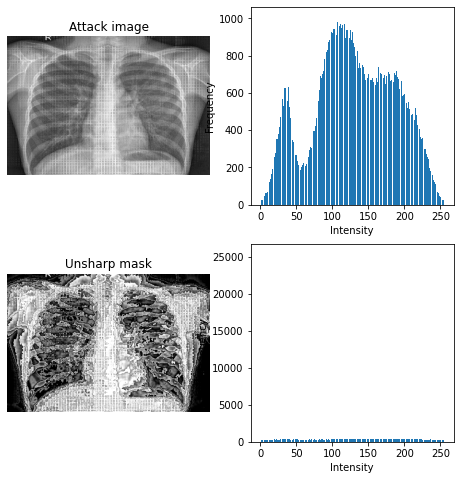

In [14]:
plt.figure(figsize=(8,8))

plt.subplot(221)
plt.imshow(img_new, cmap="gray", vmin=0, vmax=255)
plt.title("Attack image")
plt.axis('off')
plt.subplot(222)
plt.bar(range(256), hist_new)
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(223)
plt.imshow(ush_img, cmap="gray", vmin=0, vmax=255)
plt.title("Unsharp mask")
plt.axis('off')
plt.subplot(224)
plt.bar(range(256), ush_hist)
plt.xlabel('Intensity')
plt.ylabel('Frequency')

## 4 - Summary of results

### 4.1 Analysis distance between original image and attack image 
**Objective:** dectect attack 

**Useful functions**

In [129]:
#get id of image from repository
def get_id_img(path_file, t=0):
    fname = path_file.split("/")[3].split("_")[0].split(".")[0]
    result = re.sub("(^[a-z]+)", '', fname)
        
    return result

In [88]:
#calculate cosine similarity between two histograms
def cos_sim(h1, h2):
    h1_norm = np.sqrt(np.sum(h1**2))
    h2_norm = np.sqrt(np.sum(h2**2))
    sim = np.sum(h1*h2)/(h1_norm*h2_norm)
    
    return sim

In [194]:
#calculate similarity of all images selected
def calculate_sim(data):
    size = len(data)
    simil = []
    for i in range(size):
        atack_img = imageio.imread(data["Path"][i], as_gray=True)
        orig_img = imageio.imread(data["orig"][i], as_gray=True)
        h1 = df.build_histogram(atack_img, 256)
        h2 = df.build_histogram(orig_img, 256)
        sim = cos_sim(h1, h2)
        simil.append(sim)
            
    return simil

In [119]:
#Calculate culmulative distribution
def calculate_ccd(values):
    cdf = scipy.stats.norm.cdf(values)
    
    return cdf

In [165]:
#get original image from repository
def get_original_image(image_path, original):
    p = image_path.split("/")[2]
    id_at = get_id_img(image_path)
    orig_img = None
    for orig in original:
        o = orig.split("/")[2]
        id_og = get_id_img(orig)
        if id_at == id_og:
            orig_img = orig
            break
            
    return orig_img

In [210]:
#get path images
def get_images_metadata(original_path, attack_path, database=1):
    images_metadata = pd.DataFrame(columns=["Path", "orig"])
    img_orig, img_attack = [],[]
    for attk in attack_path:
        orig = get_original_image(attk, original_path)
        img_orig.append(orig)
        img_attack.append(attk)
    
    images_metadata["Path"], images_metadata["orig"] = img_orig, img_attack
    
    return images_metadata

### **Build Analysis**

In [172]:
#1 import images
attack_files1 = glob.glob("./images/attacks_experiments/*.jpeg")
attack_files2 = glob.glob("./images/attacks/*.jpeg")
original_files1 = glob.glob("./images/chest_images/*.jpeg")
original_files2 = glob.glob("./images/chest/*.jpeg")

In [190]:
#load images and get path
imgs1 = get_images_metadata(original_files1, attack_files1)
imgs2 = get_images_metadata(original_files2, attack_files2)
imgs = pd.concat([imgs1, imgs2], ignore_index=True)

In [214]:
imgs.head()

Path  \
0   ./images/chest_images/chest3.jpeg   
1  ./images/chest_images/chest10.jpeg   
2  ./images/chest_images/chest10.jpeg   
3  ./images/chest_images/chest11.jpeg   
4  ./images/chest_images/chest11.jpeg   

                                                orig  
0  ./images/attacks_experiments/img3_attack_CV_NE...  
1  ./images/attacks_experiments/img10_attack_CV_N...  
2  ./images/attacks_experiments/img10_attack_PIL_...  
3  ./images/attacks_experiments/img11_attack_CV_N...  
4  ./images/attacks_experiments/img11_attack_PIL_...

In [219]:
#calculate similarity and culmulative distribution
sim = calculate_sim(imgs)

/mnt/Dados/Linux-Files/Documentos/Doutorado/PDI/Trabalho_final/scc5830_final_project/attack/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Similarity')

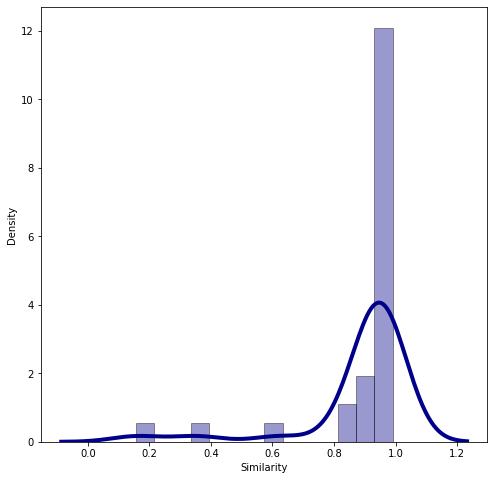

In [229]:
plt.figure(figsize=(8,8))
sns.distplot(sim, bins=int(1+3.33*np.log(len(sim))), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlabel("Similarity")

In [282]:
data = pd.DataFrame(columns=["Image", "Similarity"])
data["Similarity"] = sim
data["Image"] = np.repeat("Attack",len(sim))

In [293]:
data.head()

Image  Similarity      PSNR
0  Attack    0.958044 -6.502964
1  Attack    0.990002 -6.075736
2  Attack    0.990062 -6.117653
3  Attack    0.893253 -4.580483
4  Attack    0.887758 -4.595452

### 4.1 Peak signal-to-noise ratio (PSNR)

calculate differnce between source image and modified image. A higher PSNR (larger than 25dB) indicates proximity between image, but 15dB is accepted, and a low PSNR indiciates sucess of attack (QUIRING, 2020).  

In [235]:
def psnr(original, perturb):
    n,m = original.shape
    psnr = 10*np.log10(255/((1/(n*m)*np.sum((original - perturb)**2))))
        
    return psnr

In [248]:
def calculate_psnr(data):
    size = len(data)
    psrn = []
    attack = ImageScaling()
    for i in range(size):
        atack_img = imageio.imread(data["Path"][i], as_gray=True)
        orig_img = imageio.imread(data["orig"][i], as_gray=True)

        if atack_img.shape != orig_img.shape:
            n, m = orig_img.shape
            atack_img = attack.b_resize(atack_img, n,m)
            
        p = df.psrn(atack_img, orig_img)
        psrn.append(p)
        
    return psrn

In [292]:
psnr = calculate_psnr(imgs)
data["PSNR"] = psnr

/mnt/Dados/Linux-Files/Documentos/Doutorado/PDI/Trabalho_final/scc5830_final_project/attack/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PSNR', ylabel='Density'>

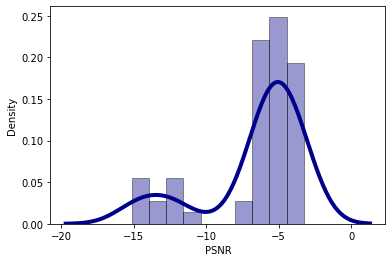

In [252]:
sns.distplot(data["PSNR"], hist=True, kde=True, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

### 4.2 Compare to defensive methods

In [260]:
def get_image_by_method(key, image="Min"):
    hist, img = None, None
    if key == "Median":
        hist, img = df.restoration_image_median(image)
    elif key == "Peak":
        hist, img = df.restoration_peak(image)
    
    hist, img = df.restoration_image_min(image)
    
    return hist, img

In [270]:
def run_experiments_sim(data):
    size = len(data)
    imgs_data = dict()
    for m in ["Min", "Median", "Peak"]:
        sim = []
        for i in range(size):
            img = imageio.imread(data["Path"][i], as_gray=True)
            orig = imageio.imread(data["orig"][i], as_gray=True)
            h1, img_r = get_image_by_method(m, img)
            h2 = df.build_histogram(orig, 256)
            sim.append(cos_sim(h1, h2))
        
        imgs_data[m] = sim
    
    return imgs_data

In [271]:
def_imgs_sim = run_experiments_sim(imgs)

In [285]:
df_sim = pd.DataFrame(columns=["Image", "Similarity"])
df_sim["Similarity"] = np.concatenate([def_imgs_sim['Min'], def_imgs_sim['Median'],  def_imgs_sim['Peak']])
df_sim["Image"] = np.concatenate([np.repeat("Min",len(def_imgs_sim['Min'])), np.repeat("Median",len(def_imgs_sim['Median'])), np.repeat("Min",len(def_imgs_sim['Peak']))])

In [286]:
df_sim.head()

Image  Similarity
0   Min    0.959439
1   Min    0.967355
2   Min    0.967021
3   Min    0.886938
4   Min    0.879123

In [272]:
def run_experiments_psnr(data):
    size = len(data)
    imgs_data = dict()
    for m in ["Min", "Median", "Peak"]:
        psnr = []
        for i in range(size):
            img = imageio.imread(data["Path"][i], as_gray=True)
            orig = imageio.imread(data["orig"][i], as_gray=True)
            _, img_r = get_image_by_method(m, img)
            psnr.append(df.psrn(img, img_r))
        
        imgs_data[m] = psnr
    
    return imgs_data

In [288]:
def_imgs_psnr = run_experiments_psnr(imgs)

In [290]:
df_psnr = pd.DataFrame(columns=["Image", "PSNR"])
df_psnr["PSNR"] = np.concatenate([def_imgs_psnr['Min'], def_imgs_psnr['Median'],  def_imgs_psnr['Peak']])
df_psnr["Image"] = np.concatenate([np.repeat("Min",len(def_imgs_psnr['Min'])), np.repeat("Median",len(def_imgs_psnr['Median'])), np.repeat("Min",len(def_imgs_psnr['Peak']))])

In [291]:
df_psnr.head()

Image      PSNR
0   Min  5.964469
1   Min  2.241041
2   Min  2.241041
3   Min  3.820733
4   Min  3.820733

In [305]:
results = pd.DataFrame(columns=["Image", "Similarity","PSNR"])
results['PSNR'] = df_psnr['PSNR']
results['Image'] = df_psnr['Image']
results['Similarity'] = df_sim['Similarity']

In [307]:
results = pd.concat([data, results], ignore_index=True)

In [308]:
results

Image  Similarity      PSNR
0    Attack    0.958044 -6.502964
1    Attack    0.990002 -6.075736
2    Attack    0.990062 -6.117653
3    Attack    0.893253 -4.580483
4    Attack    0.887758 -4.595452
..      ...         ...       ...
239     Min    0.983304  2.086270
240     Min    0.983304  2.086270
241     Min    0.883029  2.086270
242     Min    0.983386  2.086270
243     Min    0.983386  2.086270

[244 rows x 3 columns]

<AxesSubplot:xlabel='Image', ylabel='PSNR'>

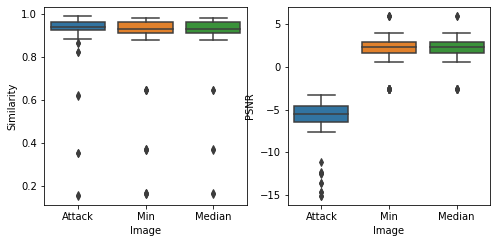

In [323]:
plt.figure(figsize=(8,8))
plt.subplot(221)
sns.boxplot(x="Image", y="Similarity", data=results)
plt.subplot(222)
sns.boxplot(x="Image", y="PSNR", data=results)

## 5 - Challenges and limitations

- Sensitivity attack
- The attack depends on target image size, rescaling algorithm, library used
- High cost to build attack